# Utilities

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [33]:
df = pd.read_csv("US_Accidents_March23.csv")

# DataCleaning

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

## DroppingColumn Which I dont Need it

In [35]:
df = df.drop(columns=["ID","Country"])
df = df.drop(columns=["Weather_Timestamp","Temperature(F)"])
df = df.drop(columns=["Amenity","Junction"])


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 40 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Source                 object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Street                 object 
 11  City                   object 
 12  County                 object 
 13  State                  object 
 14  Zipcode                object 
 15  Timezone               object 
 16  Airport_Code           object 
 17  Wind_Chill(F)          float64
 18  Humidity(%)            float64
 19  Pressure(in)           float64
 20  Visibility(mi)         float64
 21  Wind_Direction         object 
 22  Wind_Speed(mph)   

# Changing The Type

In [36]:
for col in ["Severity", "Bump", "Crossing", "Give_Way"]:
    df[col] = df[col].astype(np.uint8)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 40 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Source                 object 
 1   Severity               uint8  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Street                 object 
 11  City                   object 
 12  County                 object 
 13  State                  object 
 14  Zipcode                object 
 15  Timezone               object 
 16  Airport_Code           object 
 17  Wind_Chill(F)          float64
 18  Humidity(%)            float64
 19  Pressure(in)           float64
 20  Visibility(mi)         float64
 21  Wind_Direction         object 
 22  Wind_Speed(mph)   

In [45]:
sample = df.iloc[1:2, 36:]
sample

,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1,0,0,Night,Day


In [38]:
#CountNa = df["Sunrise_Sunset"].isna().sum() ## 23246
#countNotNa = df["Sunrise_Sunset"].notna().sum() ## 7705148
#### We Can ignore the nan rows

df = df.dropna(subset=['Sunrise_Sunset'])
df['Sunrise_Sunset'] = df['Sunrise_Sunset'].map({'Night': 0, 'Day': 1})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7705148 entries, 0 to 7728393
Data columns (total 40 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Source                 object 
 1   Severity               uint8  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Street                 object 
 11  City                   object 
 12  County                 object 
 13  State                  object 
 14  Zipcode                object 
 15  Timezone               object 
 16  Airport_Code           object 
 17  Wind_Chill(F)          float64
 18  Humidity(%)            float64
 19  Pressure(in)           float64
 20  Visibility(mi)         float64
 21  Wind_Direction         object 
 22  Wind_Speed(mph)        

In [44]:
#CountNa = df["Civil_Twilight"].isna().sum() ## 0
#countNotNa = df["Civil_Twilight"].notna().sum() ## 7705148
#print(CountNa,countNotNa)
#### We Can ignore the nan rows

df = df.dropna(subset=['Civil_Twilight'])
df['Civil_Twilight'] = df['Civil_Twilight'].map({'Night': 0, 'Day': 1})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7705148 entries, 0 to 7728393
Data columns (total 40 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Source                 object 
 1   Severity               uint8  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Street                 object 
 11  City                   object 
 12  County                 object 
 13  State                  object 
 14  Zipcode                object 
 15  Timezone               object 
 16  Airport_Code           object 
 17  Wind_Chill(F)          float64
 18  Humidity(%)            float64
 19  Pressure(in)           float64
 20  Visibility(mi)         float64
 21  Wind_Direction         object 
 22  Wind_Speed(mph)        

In [47]:
CountNa = df["Nautical_Twilight"].isna().sum() ## 0
countNotNa = df["Nautical_Twilight"].notna().sum() ## 7705148
print(CountNa,countNotNa)
#### We Can ignore the nan rows

df = df.dropna(subset=['Nautical_Twilight'])
df['Nautical_Twilight'] = df['Nautical_Twilight'].map({'Night': 0, 'Day': 1})
df.info()

0 7705148
<class 'pandas.core.frame.DataFrame'>
Index: 7705148 entries, 0 to 7728393
Data columns (total 40 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Source                 object 
 1   Severity               uint8  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Street                 object 
 11  City                   object 
 12  County                 object 
 13  State                  object 
 14  Zipcode                object 
 15  Timezone               object 
 16  Airport_Code           object 
 17  Wind_Chill(F)          float64
 18  Humidity(%)            float64
 19  Pressure(in)           float64
 20  Visibility(mi)         float64
 21  Wind_Direction         object 
 22  Wind_Speed(mp

In [50]:
CountNa = df["Astronomical_Twilight"].isna().sum() ## 0
countNotNa = df["Astronomical_Twilight"].notna().sum() ## 7705148
print(CountNa,countNotNa)
#### We Can ignore the nan rows

#df = df.dropna(subset=["Astronmical_Twilight"])
df["Astronomical_Twilight"] = df["Astronomical_Twilight"].map({'Night': 0, 'Day': 1})
df.info()

0 7705148
<class 'pandas.core.frame.DataFrame'>
Index: 7705148 entries, 0 to 7728393
Data columns (total 40 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Source                 object 
 1   Severity               uint8  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Street                 object 
 11  City                   object 
 12  County                 object 
 13  State                  object 
 14  Zipcode                object 
 15  Timezone               object 
 16  Airport_Code           object 
 17  Wind_Chill(F)          float64
 18  Humidity(%)            float64
 19  Pressure(in)           float64
 20  Visibility(mi)         float64
 21  Wind_Direction         object 
 22  Wind_Speed(mp

In [51]:
for col in ["Sunrise_Sunset","Civil_Twilight","Nautical_Twilight","Astronomical_Twilight"]:
    df[col] = df[col].astype(np.uint8)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7705148 entries, 0 to 7728393
Data columns (total 40 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Source                 object 
 1   Severity               uint8  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Street                 object 
 11  City                   object 
 12  County                 object 
 13  State                  object 
 14  Zipcode                object 
 15  Timezone               object 
 16  Airport_Code           object 
 17  Wind_Chill(F)          float64
 18  Humidity(%)            float64
 19  Pressure(in)           float64
 20  Visibility(mi)         float64
 21  Wind_Direction         object 
 22  Wind_Speed(mph)        

# Understanding The Dataframe

## Sample

In [ ]:
sample_Lat = df["Start_Lat"].head()
sample_Lat
sample_lon = df["Start_Lng"].head()
sample_lon



-124.623833

## Min & Max

In [ ]:
min_lat = df["Start_Lat"].min() #24.5548
min_lat
min_lng = df["Start_Lng"].min() #-124.623833
min_lng

Max_lat = df["Start_Lat"].max() #49
Max_lat

Max_lng = df["Start_Lng"].max() #-67
Max_lng

-67.113167

## Central Indexes

### Mean

In [82]:
mean_lat = df[df["City"] == "Reynoldsburg"]["Start_Lat"].mean()
mean_lng = df[df["City"] == "Reynoldsburg"]["Start_Lng"].mean()
print(mean_lat,mean_lng)

0.737764333710258 0.684549239346642


### Std

In [83]:
std_Lat = df[df["City"] == "Reynoldsburg"]["Start_Lat"].std()
std_lng = df[df["City"] == "Reynoldsburg"]["Start_Lng"].std()
print(std_Lat,std_lng)

0.003790858294806144 0.0014412226847290335


## Normalize

$z = \frac{x - \mu}{\sigma}$

In [84]:
# First Soloution of doing

def Normalizer(value : int, mean : float,std : float):
    NormalParam = value
    NormalParam = NormalParam - mean
    NormalParam = NormalParam/std
    return NormalParam

df["Start_Lat"] = df[df["City"] == "Reynoldsburg"]["Start_Lat"].apply(lambda X : Normalizer(X,mean_lat,std_Lat))
df["Start_Lng"] = df[df["City"] == "Reynoldsburg"]["Start_Lng"].apply(lambda Y : Normalizer(Y,mean_lng,std_lng))

In [69]:
# Seccond soloution directly on data
#df["Start_Lat_Normalized"] = df["Start_Lat"]-df["Start_Lat"].mean()/df["Start_Lat"].std()
#df["Start_Lng_Normalized"] = df["Start_Lng"]-df["Start_Lng"].mean()/df["Start_Lng"].std()
x = df["Start_Lat"].max()
x

2.5223577811305584

# Ploting

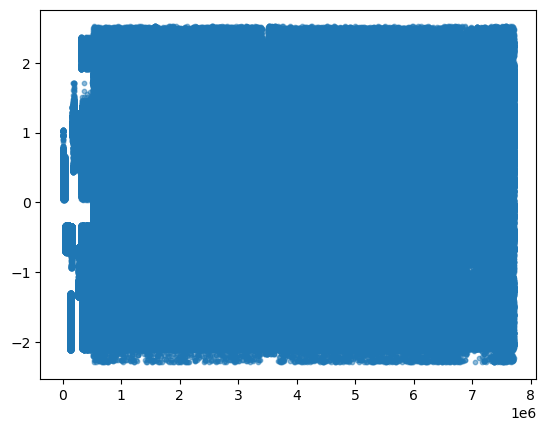

In [71]:
plt.scatter(range(len(df["Start_Lat"])), df['Start_Lat'], alpha=0.5, s=10)
plt.show()

In [85]:
# because That happen i sampled the data

s = (df["City"] == "Reynoldsburg").sum()
s
# 476


476

In [86]:
start_lat_reynoldsburg = df[df["City"] == "Reynoldsburg"]["Start_Lat"]
start_lng_Reynoldsburg = df[df["City"] == "Reynoldsburg"]["Start_Lng"]

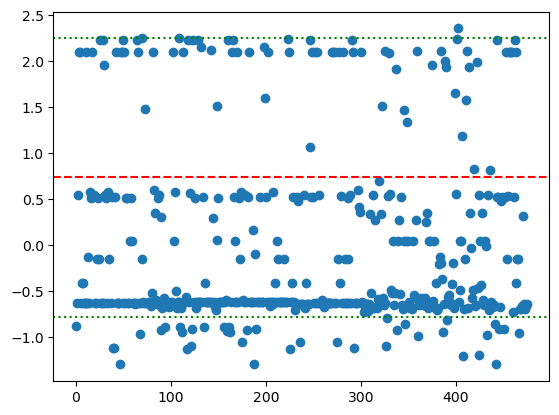

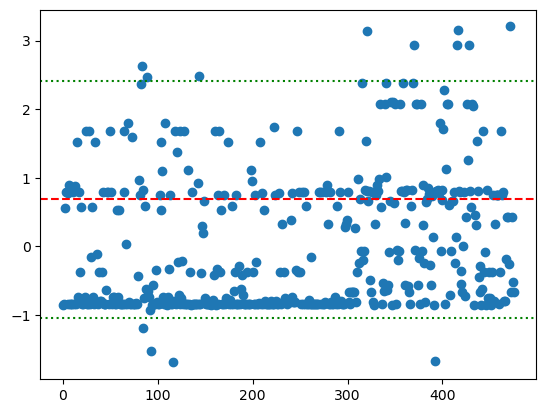

In [100]:
plt.scatter(range(len(start_lat_reynoldsburg)),start_lat_reynoldsburg)
plt.axhline(y=mean_lat, color='red', linestyle='--', label='Mean')
plt.axhline(y=mean_lat + 400*std_Lat, color='green', linestyle=':', label='Mean + 2 STD')
plt.axhline(y=mean_lat - 400*std_Lat, color='green', linestyle=':', label='Mean - 2 STD')
plt.show()

plt.scatter(range(len(start_lng_Reynoldsburg)),start_lng_Reynoldsburg)
plt.axhline(y=mean_lng, color='red', linestyle='--', label='Mean')
plt.axhline(y=mean_lng + 1200*std_lng, color='green', linestyle=':', label='Mean + 2 STD')
plt.axhline(y=mean_lng - 1200*std_lng, color='green', linestyle=':', label='Mean - 2 STD')
plt.show()
